### Importing libraries and the dataset

In [36]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import matplotlib

In [5]:
path=r'C:\Users\BaratSakhizada\Desktop\data analytics\Assignments\Achievement 6\02 Data\Prepared Data'

In [13]:
df_house = pd.read_pickle(os.path.join(path, 'Ex 6.1 house_cleaned.pickle'))

In [19]:
pd.options.display.max_columns = None

In [21]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,apartment_grade,house_view,house_condition,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average_Construction_Design,No_View,Average,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average_Construction_Design,No_View,Average,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average_Construction_Design,No_View,Average,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average_Construction_Design,No_View,Very Good,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High_Construction_Design,No_View,Average,2015,2


### Creating a subset of variables 

In [28]:
# list of columns we want to keep in the subset
columns_to_keep = ['price', 'bedrooms', 'floors', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated',]

# creating a new DataFrame containing only these columns
df_house_subset = df_house[columns_to_keep]

In [30]:
df_house_subset.head()

,price,bedrooms,floors,sqft_living,sqft_lot,yr_built,yr_renovated
0,221900.0,3,1.0,1180,5650,1955,0
1,538000.0,3,2.0,2570,7242,1951,1991
2,180000.0,2,1.0,770,10000,1933,0
3,604000.0,4,1.0,1960,5000,1965,0
4,510000.0,3,1.0,1680,8080,1987,0


### Creating a Correlation Matrix for all the variables

In [90]:
# creating a correlation matrix for variables in the subset
df_house_subset.corr()

,price,bedrooms,floors,sqft_living,sqft_lot,yr_built,yr_renovated
price,1.000000,0.308350,0.256794,0.702035,0.089661,0.054012,0.126434
bedrooms,0.308350,1.000000,0.175429,0.576671,0.031703,0.154178,0.018841
floors,0.256794,0.175429,1.000000,0.353949,-0.005201,0.489319,0.006338
sqft_living,0.702035,0.576671,0.353949,1.000000,0.172826,0.318049,0.055363
sqft_lot,0.089661,0.031703,-0.005201,0.172826,1.000000,0.053080,0.007644
yr_built,0.054012,0.154178,0.489319,0.318049,0.053080,1.000000,-0.224874
yr_renovated,0.126434,0.018841,0.006338,0.055363,0.007644,-0.224874,1.000000


### Creating a Correlation Heatmap

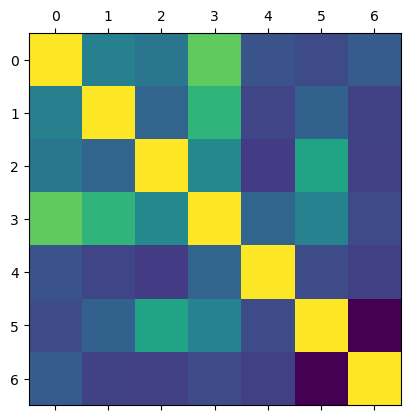

In [40]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_house_subset.corr())
plt.show()

In [ ]:
f = plt.figure(figsize=(8,8))

Text(0.5, 1.0, 'Correlation Matrix')

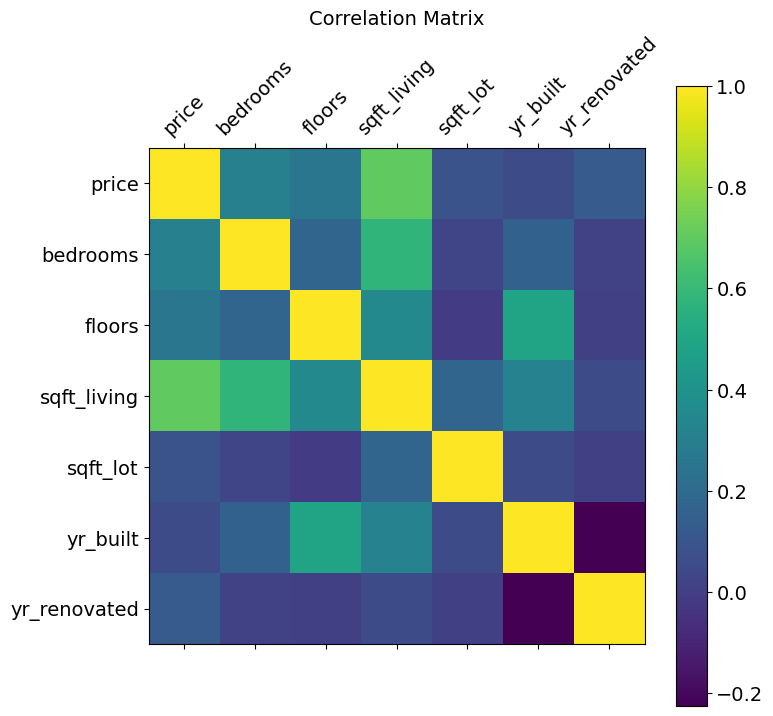

In [44]:
# Add labels, legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_house_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_house_subset.shape[1]), df_house_subset.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_house_subset.shape[1]), df_house_subset.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

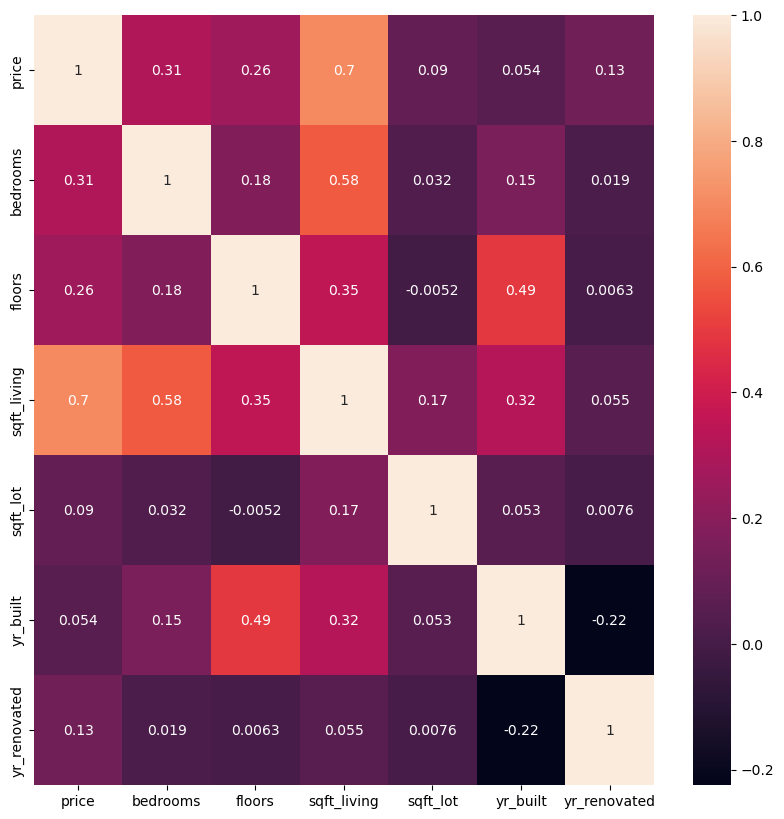

In [48]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_house_subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

sqft_living is the most influential factor on house price, with a strong positive correlation (0.7). Variables like sqft_lot, yr_built, and yr_renovated have weak correlations with house prices, suggesting that they may not play as crucial a role in determining the price compared to living area. There is a weak positive correlation between renovation year and price, which indicates that renovated homes might have slightly higher prices, but the relationship isn't very strong. yr_built and yr_renovated (-0.22): This shows a slight negative correlation, meaning that homes built earlier are more likely to have been renovated. Other factors like bedrooms and floors have moderate but less significant positive correlations with the price.

### Creating Scatterplots for separate variables

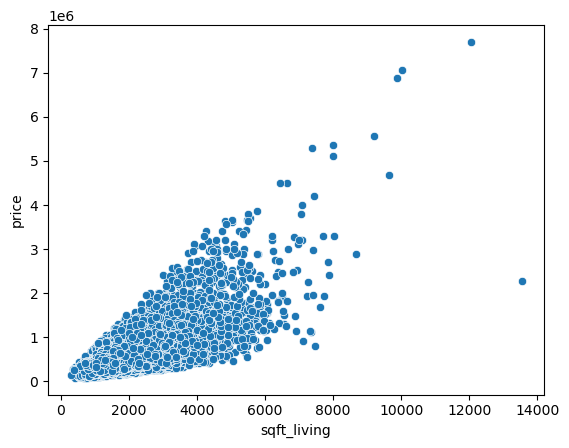

In [54]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn
scatterplot_pirce = sns.scatterplot(x = 'sqft_living', y = 'price', data = df_house_subset)

The plot shows a positive relationship between sqft_living and price. As the square footage of living space increases, the price of the house tends to increase as well. This aligns with the high positive correlation of 0.7 from the heatmap. In the lower ranges of sqft_living (below 4000 sqft), there is a higher concentration of points, meaning most of the houses in the dataset are smaller in size. There are some points where large homes (e.g., above 10,000 sqft) have a wide range of prices, possibly indicating outliers or luxury homes.

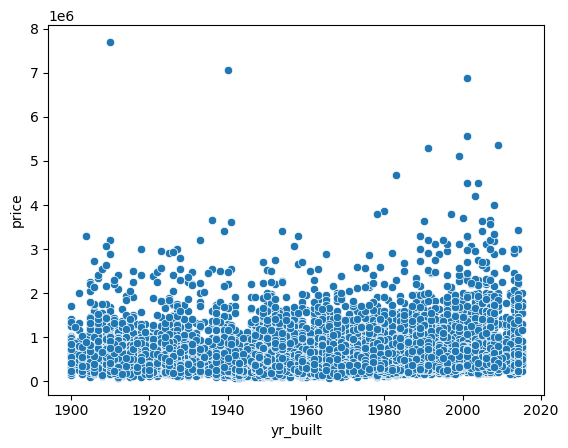

In [68]:
scatterplot_bedrooms = sns.scatterplot(x = 'yr_built', y = 'price', data = df_house_subset)

There's no strong upward or downward trend between the year built and price. While we might expect newer homes to be more expensive, the prices appear fairly dispersed across all years, suggesting other factors are influencing price more strongly.A few houses have very high prices (close to 8 million), which stand out significantly from the rest of the data. These could represent luxury properties or houses with unique features, regardless of the year built. The majority of houses, regardless of when they were built, are clustered below 2 million in price. There seems to be a slight increase in the upper range of house prices for houses built after 1980 or 2000, but it's not a very strong pattern. 

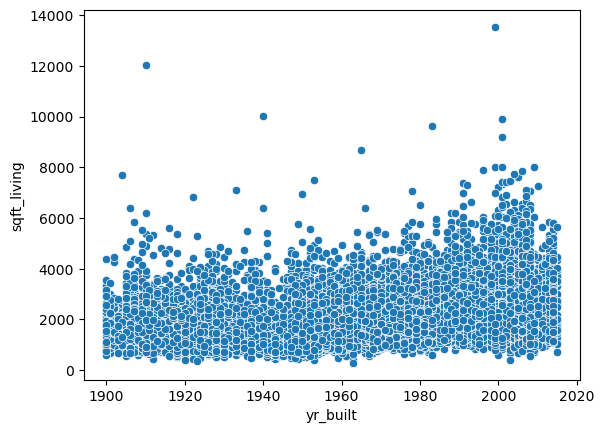

In [70]:
scatterplot_living = sns.scatterplot(x = 'yr_built', y = 'sqft_living', data = df_house_subset)

The correlation between yr_built (the year the house was built) and sqft_living (the square footage of living space) indicates a moderate positive correlation. A correlation of 0.32 suggests that as the year a house was built increases (i.e., newer houses), the square footage of living space tends to be larger. However, this correlation is not very strong, meaning that while there is a positive relationship between these two variables, it's not the only factor determining the size of the house.

### Creating Pairplot

In [82]:
# List of columns we want to keep in the subset
columns_to_keep2 = ['price', 'sqft_living', 'sqft_lot', 'yr_built']

# Create a new DataFrame containing only these columns
df_house_subset2 = df_house[columns_to_keep2]

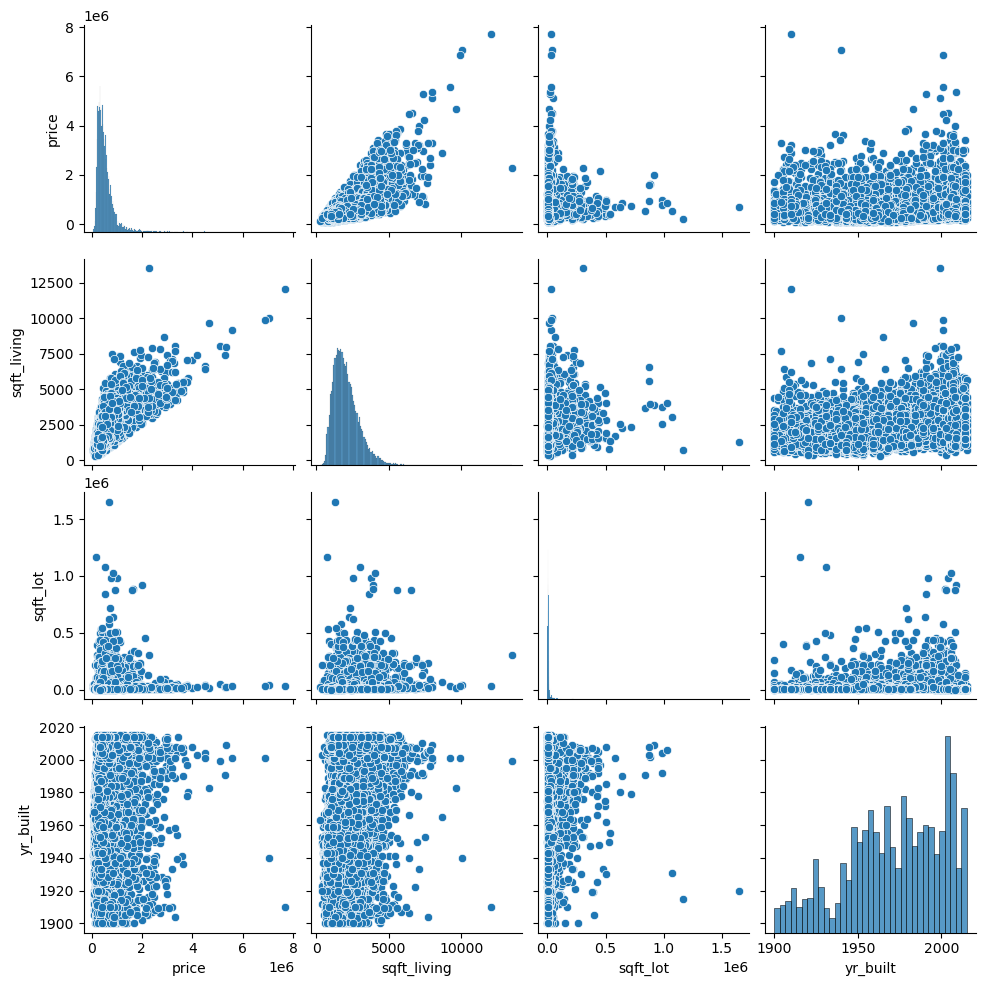

In [84]:
pairplot = sns.pairplot(df_house_subset2)
pairplot

Histograms:
Price: most houses are priced below 2 million with a few outliers reaching above 6 million. 
Sqft_living: Most houses have less than 5,000 square feet of living space. 
Yr_built: Houses are distributed over time, with more homes being built in the mid-1900s to 2000s.
Scatterplots:
Price vs Sqft_living: There is a positive correlation, suggesting that larger homes (in terms of living space) tend to have higher prices.
Price vs Sqft_lot: The relationship is not as strong as with living space, though higher-priced homes can have larger lots.
Price vs Yr_built: There is a correlation but a weak one, indicating price doesn’t have a strong relationship with the year built. 
Sqft_living vs Sqft_lot: The scatterplot shows no clear pattern, suggesting these two variables may be independent of each other.
Sqft_living vs Yr_built: Homes built after 1950 tend to have larger living areas.
Sqft_lot vs Yr_built: No strong relationship here, as homes built across all years vary widely in lot size. 

The pairplot highlights the positive correlation between price and sqft_living, as well as the distribution patterns of each variable. Other relationships, such as between lot size and price, are less clear, indicating that further analysis might be needed to understand these factors.


### Create a categorical plot and interpret the results.


In [100]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,apartment_grade,house_view,house_condition,year_sold,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Average_Construction_Design,No_View,Average,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Average_Construction_Design,No_View,Average,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Average_Construction_Design,No_View,Average,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Average_Construction_Design,No_View,Very Good,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,High_Construction_Design,No_View,Average,2015,2


### Categorical plot showing house price in relation to its condition

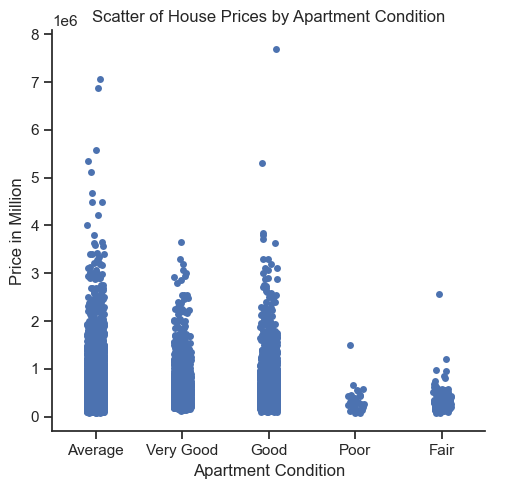

In [128]:
# Strip plot to show individual data points for each condition
sns.catplot(x="house_condition", y="price", data=df_house, kind="strip", jitter=True)
plt.title("Scatter of House Prices by Apartment Condition")
plt.xlabel("Apartment Condition")
plt.ylabel("Price in Million")
plt.show()

In categories representing poor or fair conditions, the house prices are generally lower. Most data points in these categories seem concentrated towards the lower end of the price range. For houses with an average condition, there's a wider spread in prices. While some houses are still in the lower price range, others can be priced higher, indicating more variability in pricing for average-condition houses. In the good and very good condition categories, house prices are generally higher.Overall, the plot suggests that there is a positive relationship between the house's condition and its price. As the condition improves (moving from poor to very good), the house prices tend to increase, although there might be some overlap or variability within each category.

Hypothesis
1 - there is a strong positive correlation between house price and space for living
2 - There is weak negative correlation between year house built and year house renovated.
3 - There is positive weak to no correlation between year houses built and price.
4 - There is positive weak to no correlation between year renovated and price. 